Radial grid information:

dx =  0.01
x_min =  -8.0
n_points =  1410
r(0) =  0.00033546262790251185
r(n_points) =  445.85777008251677
-----------------------------------------------

potential saved in 'coulomb_potential.csv'

potential saved in 'potential_with_yukawa.csv'

-----------------------------------------------

convergence for n = 1 achived at iter #    7, de =  -1.30564651e-11, e =  -9.98666543e-01

-----------------------------------------------

convergence for n = 2 achived at iter #   10, de =  -2.23200610e-13, e =  -2.49833228e-01

-----------------------------------------------

convergence for n = 3 achived at iter #   10, de =  -1.22182726e-14, e =  -1.11061689e-01

-----------------------------------------------

convergence for n = 4 achived at iter #   10, de =  -4.53132810e-11, e =  -6.24791484e-02

-----------------------------------------------

convergence for n = 5 achived at iter #   13, de =  -4.88917526e-15, e =  -3.99893237e-02

--------------------------

'  \n\n#compute all possible results (for this range)\nfor i in range(1,15):\n    \n    e_coulomb[i - 1], y_coulomb, p_shift_coulomb[i - 1] = solve_schrodinger(n_points, dx, v_pot_1, r2, r, sqrt_r, n, l)\n    e_yuk[i - 1], y_yuk, p_shift_yuk[i - 1] = solve_schrodinger(n_points, dx, v_pot_2, r2, r, sqrt_r, n, l)\n\n    #saving the eigenfunctions\n    df1 = pd.DataFrame({"r": r, r\'$\\psi$\': y_coulomb})\n    df2 = pd.DataFrame({"r": r, r\'$\\psi$\': y_yuk})\n\n    df1.to_csv(f"eigenfunction_coulomb_{i}.csv", index=False)\n    df2.to_csv(f"eigenfunction_yukawa_{i}.csv", index=False)\n\n    #plotting eigenfunctions\n    plt.figure()\n    plt.plot(r, y_coulomb, label = r\'$\\psi(r)$\', color = \'red\')\n    plt.xlabel("r")\n    plt.ylabel(r\'$\\psi(r)$\')\n    plt.title(f"coulomb wavefunction n = {i}")\n    plt.legend\n    plt.grid(True)\n    plt.savefig(f"coulomb_wavefunction_{i}.pdf")\n    plt.close() #to save memory\n\n    plt.figure()\n    plt.plot(r, y_yuk, label = r\'$\\psi(r)$\', co

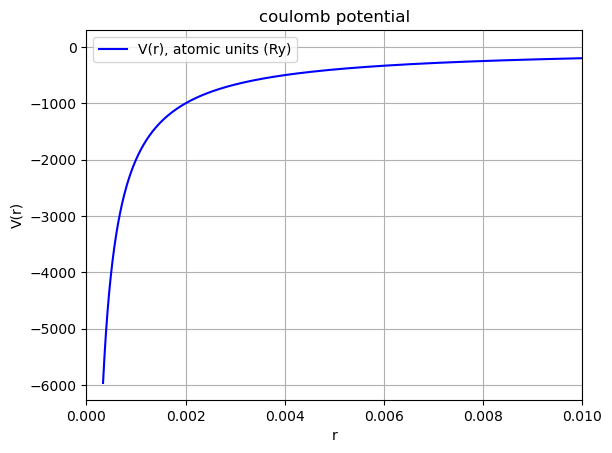

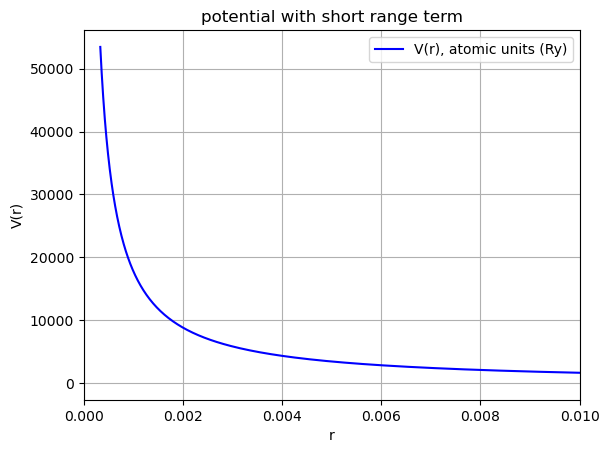

In [36]:
#Radial Schrodinger equation using Numerov method - atomic (Ry) units

import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
from scipy.optimize import curve_fit


#functions
def prepare_grid(n_points, x_min, dx):

    #preparing x-array
    x = np.linspace(x_min, x_min + ((n_points - 1) * dx), n_points)
    x = np.append(x, x[n_points - 1] + dx)

    #generate r, sqrt_r, and r^2 based on logarithmic x grid
    r = np.exp(x)
    sqrt_r = np.sqrt(r)
    r2 = np.power(r, 2)

    #print grid information
    print("Radial grid information:\n")
    print("dx = ", dx)
    print("x_min = ", x_min)
    print("n_points = ", n_points)
    print("r(0) = ", r[0])
    print("r(n_points) = ", r[n_points])
    print("-----------------------------------------------\n")

    return r, sqrt_r, r2


def yuk_potential(r):

    #definition of the potential
    v_pot = -2/r + (20 * np.exp(-r/0.1))  / r 

    #saving the potential to CSV
    df_pot = pd.DataFrame({"r": r, "V(r)": v_pot})
    df_pot.to_csv("potential_with_yukawa.csv", index=False)
    print("potential saved in 'potential_with_yukawa.csv'\n")

    
    #plotting the potential
    plt.figure()
    plt.plot (r, v_pot, label=r'V(r), atomic units (Ry)', color ='b')
    plt.xlabel("r")
    plt.ylabel("V(r)")
    plt.title("potential with short range term")
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 0.01)
    plt.savefig("potential_with_yukawa_plot.pdf")
    
    return v_pot

def coulomb_potential(r):

    #definition of the potential
    v_pot = -2/r

    #saving the potential to CSV
    df_pot = pd.DataFrame({"r": r, "V(r)": v_pot})
    df_pot.to_csv("coulomb_potential.csv", index=False)
    print("potential saved in 'coulomb_potential.csv'\n")

    
    #plotting the potential
    plt.figure()
    plt.plot (r, v_pot, label=r'V(r), atomic units (Ry)', color ='b')
    plt.xlabel("r")
    plt.ylabel("V(r)")
    plt.title("coulomb potential")
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 0.01)
    plt.savefig("coulomb_potential_plot.pdf")
    
    return v_pot

def delta_func_potential(r, c):

    a = 1E-6 #parameter for delta function

    #definition of the potential
    v_pot = c * (a / (np.sqrt(np.pi))) * np.exp(- (r * r) / a) - 2/r

    #saving the potential to CSV
    df_pot = pd.DataFrame({"r": r, "V(r)": v_pot})
    df_pot.to_csv("delta_func_potential.csv", index=False)
    print("potential saved in 'delta_func_potential.csv'\n")

    #plotting the potential
    plt.figure()
    plt.plot (r, v_pot, label=r'V(r), atomic units (Ry)', color ='b')
    plt.xlabel("r")
    plt.ylabel("V(r)")
    plt.title("delta function potential")
    plt.grid(True)
    plt.legend()
    plt.xlim(0, 0.01)
    plt.savefig("delta_func_potential_plot.pdf")

    return v_pot
          
def solve_schrodinger(n_points, dx, v_pot, r2, r, sqrt_r, n, l):
    #solve the schrodinger equation in radial coordinates on a logarithmic
    #grid by Numerov method - atomic units

    eps = 1E-10 #tolerance for eigenvalue
    n_iter = 400
    
    ddx12 = (dx * dx) / 12
    sqlhf = (l + 0.5) * (l + 0.5) #
    x2l2 = 2*l + 2
    
    #initial lower and upper bounds to the eigenvalue
    #actually here we should write something that compute the minimum
    print("-----------------------------------------------\n")
    e_upp = v_pot[n_points]
    e_low = e_upp

    for j in range(0, n_points + 1):
        e_low = np.minimum(e_low, sqlhf / r2[j] + v_pot[j])
    
    if (e_upp - e_low < eps):
        print("error in solving schrodinger: e_upp and e_low coincide", file = sys.stderr)
        sys.exit(1)
            
    e = (e_low + e_upp) * 0.5

    f = np.zeros(n_points + 1) #f-function for Numerov

    class_inv = -1 #index of classical inversion point

    #start loop on energy
    de = 1E10 #any number greater the eps
    i = 0
    
    while i  < n_iter and np.absolute(de) > eps:
        #set up the f-function (in a way to determine the position of its last change
        #of sign)

        f[0] = ddx12 * ((r2[0] * (v_pot[0] - e)) + sqlhf)
        for j in range(1, n_points + 1):
            f[j] = ddx12 * ((r2[j] * (v_pot[j] - e)) + sqlhf)

            #if f[j] is exactly zero (unlikely) the change of sign is not observed 
            #trick to prevent missing change of sign
            if (f[j] == 0.):
                f[j] = 1E-20

            #take the index of classical inversion
            if np.sign(f[j]) != np.sign(f[j - 1]):
                class_inv = j

        if class_inv < 0 or class_inv >= n_points - 2:
            print(f"{class_inv:4d} {n_points:4d}")
            print("error in solving schrodinger: last change of sign too far", file = sys.stderr)
            sys.exit(1)

        #let's rewrite the f-function how required by numerov method
        
        f = 1 - f

        y = np.zeros(n_points + 1) #wavefunction

        #wavefunction in the first two points
        nodes = n - l - 1
        y[0] = 1E-12
        y[1] = 1E-10
        
        #outward integration with node counting
        n_cross = 0
        for j in range(1, class_inv):
            y[j + 1] = ((12. - f[j] * 10.) * y[j] - f[j - 1] * y[j - 1]) / f[j + 1]
            if np.sign(y[j]) != np.sign(y[j + 1]):
                n_cross += 1

        y_matching = y[class_inv] #value of the wavefunction at classical turning point
        
        #check the number of crossings
        if (n_cross != nodes):
            #incorrect number of nodes
            if (n_cross > nodes):
                e_upp = e
            else:
                e_low = e

            e = (e_upp + e_low) * 0.5

        else:
            #correct number of nodes, we can perform inward integration.

            #determination of the rave function in last two points
            y[n_points] = dx
            y[n_points - 1] = (12. - f[n_points] * 10.) * y[n_points] / f[n_points - 1]

            #inward integration
            for j in range(n_points - 1, class_inv, -1):
                y[j - 1] = ((12. - f[j] * 10.) * y[j] - f[j + 1] * y[j + 1]) / f[j - 1]
                if (y[j - 1] > 1E10):
                    for m in range(n_points, j - 2, -1):
                        y[m] /= y[j - 1]

            #rescale the function to match at the classical turning point
            y_matching /= y[class_inv]
            for j in range(class_inv, n_points + 1):
                y[j] *= y_matching

            #normalize on the segment
            norm = 0.

            for j in range(1, n_points + 1):
                norm += y[j] * y[j] * r2[j] * dx

            norm = np.sqrt(norm)

            for j in range(0, n_points + 1):
                y[j] /= norm

            #find the value of the cusp at the matchin point
            j = class_inv
            y_cusp = (y[j - 1] * f[j - 1] + f[j + 1] * y[j + 1] + f[j] * 10. * y[j]) / 12.
            df_cusp = f[j] * (y[j] / y_cusp - 1.)

            # eigenvalue update using perturbation theory
            de = df_cusp / ddx12 * y_cusp * y_cusp * dx
            if (de > 0.):
                e_low = e
            if (de < 0.):
                e_upp = e

            e = e + de
            #prevent e to go out of bounds ( e > e_upp or e < e_low)
            #could happen far from convergence
            e = np.minimum(e, e_upp)
            e = np.maximum(e, e_low)

        i += 1
    
    #convergence not achived
    if (np.abs(de) > eps):
        if n_cross != nodes:
            print(f"n_cross={n_cross:4d} nodes={nodes:4d} class_inv={class_inv:4d} " 
                f"e={e:16.8e} e_low={e_low:16.8e} e_upp={e_upp:18.8e}", file=sys.stderr)
        else:
            print(f"e={e:16.8e} de={de:16.8e}", file=sys.stderr)

        print(f"solve_schrodinger not converged after {n_iter} iterations", file=sys.stderr)
        sys.exit(1)

    #convergence achived
    print(f"convergence for n = {n} achived at iter # {i:4d}, de = {de:16.8e}, e = {e:16.8e}\n")

    #compute phase shift ar r=100
    i_50 = 1261 #index corresponding to r = 100
    phase_shift = np.arcsin(y[i_50]) - np.sqrt(np.absolute(e)) * r[i_50] + (l * np.pi)/2

    return e, y, phase_shift

#program starts here-------------------------------------------------------------------------


#grid parameters
r_max = 450. 
x_min = -8. #corresponds to r_min == 3 * 1E-4 Bohr radii
dx = 0.01 #grid spacing

#number of points of the grid
n_points = int((np.log(r_max) - x_min) / dx)

#initialize logarithmic grid
r, sqrt_r, r2 = prepare_grid(n_points, x_min, dx)

#initialize potential
v_pot_1 = coulomb_potential(r)
v_pot_2 = yuk_potential(r)

#quantic numbers
n = 1
l = 0 #fixed, considering only s-wave
n_max = 14 #maximum energetic level (because of range)

#initialize eigenvalues and phase shifts arrays
e_n = np.zeros(n_max) #because of our range
e_yuk = np.zeros(n_max)
p_shift_n = np.zeros(n_max)
p_shift_yuk = np.zeros(n_max)
y_n = np.zeros((n_max, n_points + 1))
pot_1_name = "coulomb"

def analysis(n_max, pot_name, e_n, p_n, y_n, n_points, dx, v_pot, r2 , r, sqrt_r):
    #quantic numbers
    n=1
    l=0 #fixed, considering only s-wave
    
    for i in range(1, n_max +1):
        e_n[i-1], y_n[i-1], p_n[i-1] = solve_schrodinger(n_points, dx, v_pot, r2, r, sqrt_r, n ,l)

        #saving and plotting eigenfunctions
        y_df = pd.DataFrame({"r": r, "y": y_n[i-1]})
        y_df.to_csv(f"eigenfunction_{pot_name}_{i}.csv", index=False)

        plt.figure()
        plt.plot(r, sqrt_r * y_n[i-1], label = r'$\chi$', color = 'red')
        plt.xlabel("r")
        plt.ylabel(r'$\chi(r)$')
        plt.title(f"{pot_name} wavefunction n = {i}")
        plt.legend
        plt.grid(True)
        plt.savefig(f"{pot_name}_wavefunction_{i}.pdf")
        plt.close() #to save memory
        
        n += 1 #next energy level

    n_arr = np.arange(1, n_max + 1)

    #saving eigenvalues, phase shifts
    e_df = pd.DataFrame({"n": n_arr, "E": e_n})
    e_df.to_csv(f"energy_eigenvalues_{pot_name}.csv", index=False)

    p_df = pd.DataFrame({"n": n_arr, "phase shift": p_n})
    p_df.to_csv(f"phase_shift_{pot_name}.csv", index=False)

    return e_n, y_n, p_n

e_coulomb, y_coulomb, p_shift_coulomb = analysis(n_max, pot_1_name, e_n, p_shift_n, y_n, n_points, dx, v_pot_1, r2, r ,sqrt_r)

"""  

#compute all possible results (for this range)
for i in range(1,15):
    
    e_coulomb[i - 1], y_coulomb, p_shift_coulomb[i - 1] = solve_schrodinger(n_points, dx, v_pot_1, r2, r, sqrt_r, n, l)
    e_yuk[i - 1], y_yuk, p_shift_yuk[i - 1] = solve_schrodinger(n_points, dx, v_pot_2, r2, r, sqrt_r, n, l)

    #saving the eigenfunctions
    df1 = pd.DataFrame({"r": r, r'$\psi$': y_coulomb})
    df2 = pd.DataFrame({"r": r, r'$\psi$': y_yuk})

    df1.to_csv(f"eigenfunction_coulomb_{i}.csv", index=False)
    df2.to_csv(f"eigenfunction_yukawa_{i}.csv", index=False)

    #plotting eigenfunctions
    plt.figure()
    plt.plot(r, y_coulomb, label = r'$\psi(r)$', color = 'red')
    plt.xlabel("r")
    plt.ylabel(r'$\psi(r)$')
    plt.title(f"coulomb wavefunction n = {i}")
    plt.legend
    plt.grid(True)
    plt.savefig(f"coulomb_wavefunction_{i}.pdf")
    plt.close() #to save memory

    plt.figure()
    plt.plot(r, y_yuk, label = r'$\psi(r)$', color = 'blue')
    plt.xlabel("r")
    plt.ylabel(r'$\psi(r)$')
    plt.title(f"short potential wavefunction n = {i}")
    plt.legend
    plt.grid(True)
    plt.savefig(f"yuk_wavefunction_{i}.pdf")
    plt.close()

    print(f"eigenfunctions n = {i} saved")
    
    n += 1 #increase quantic number

print("-----------------------------------------------\n")

#interpolarion of the eigenvalues
n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

#saving eigenvalues and phase shifts
eigen_coulomb_df = pd.DataFrame({"n": n_arr, r'$E_n$': e_coulomb})
eigen_short_df = pd.DataFrame({"n": n_arr, r'$E_n$': e_yuk})
p_shift_coulomb_df = pd.DataFrame({"n": n_arr, r'$\delta_0$':p_shift_coulomb})
p_shift_yuk_df = pd.DataFrame({"n": n_arr, r'$\delta_0$':p_shift_yuk})

eigen_coulomb_df.to_csv(f"energy_eigenvalues_coulomb.csv", index=False)
eigen_short_df.to_csv(f"energy_eigenvalues_short.csv", index=False)
p_shift_coulomb_df.to_csv(f"phase_shift_coulomb.csv", index=False)
p_shift_yuk_df.to_csv(f"phase_shift_yuk.csv", index=False)

def my_function(n_arr, p):
    return ( -1 / (n_arr ** 2) + p * (1 / (np.sqrt(np.pi) * n_arr ** 3)))

#find the best p that fits data
p_opt, _ = curve_fit(my_function, n_arr, e_yuk)   
best_p = p_opt[0]
print("parameter fitting for delta model: ", best_p)

#now we extract the parameter for the lowest-energy data

best_p_2 = np.sqrt(np.pi) * ((10**3) * e_yuk[9] + 5)
print("parameter lowest energy data for delta model: ", best_p_2)

v_pot_3 = delta_func_potential(r, best_p_2)

#do againg the stuff above maybe the it's better to define a function there is nosense in making so many loops
e_delta = np.zeros(20)
p_shift_delta = np.zeros(20)

m=1# is like m above

#compute all possible results (for this range)
for i in range(1,15):
    
    e_delta[i - 1], y_delta, p_shift_delta[i - 1] = solve_schrodinger(n_points, dx, v_pot_3, r2, r, sqrt_r, m, l)


    #saving the eigenfunctions
    df3 = pd.DataFrame({"r": r, r'$\psi$': y_delta})

    df3.to_csv(f"eigenfunction_delta_{i}.csv", index=False)


    #plotting eigenfunctions
    plt.figure()
    plt.plot(r, y_delta, label = r'$\psi(r)$', color = 'green')
    plt.xlabel("r")
    plt.ylabel(r'$\psi(r)$')
    plt.title(f"delta wavefunction n = {i}")
    plt.legend
    plt.grid(True)
    plt.savefig(f"delta_wavefunction_{i}.pdf")
    plt.close() #to save memory


    print(f"eigenfunctions delta n = {i} saved")
    
    m += 1 #increase quantic number

#saving eigenvalues for delta potential
eigen_delta_df = pd.DataFrame({"n": n_arr, r'$E_n$': e_delta})

eigen_delta_df.to_csv(f"energy_eigenvalues_delta.csv", index=False)

#show all the graphs
plt.show
"""